Book Genre Classification

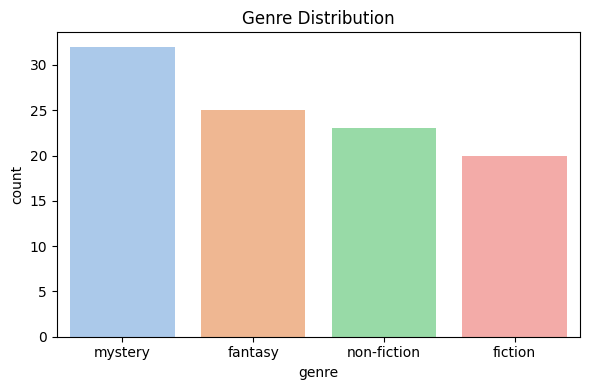

Classification Report:

              precision    recall  f1-score   support

     fantasy       0.29      0.50      0.36         4
     fiction       1.00      1.00      1.00         1
     mystery       0.67      0.60      0.63        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.55        20
   macro avg       0.65      0.62      0.62        20
weighted avg       0.61      0.55      0.56        20



<ipython-input-21-21ebf990bf97>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="mako")


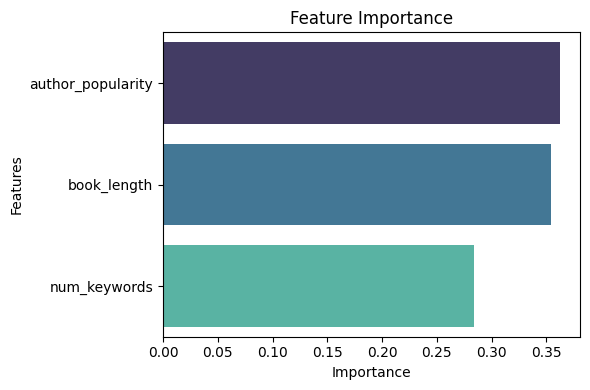

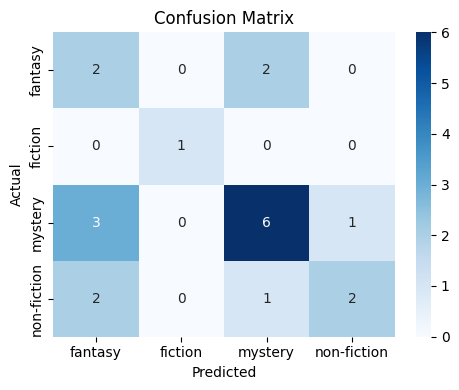

In [21]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# --- Load Dataset ---
df = pd.read_csv("/content/book_genres.csv")

# --- Visual 1: Genre Distribution (Warning-Free) ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='genre', hue='genre', palette='pastel', legend=False)
plt.title("Genre Distribution")
plt.tight_layout()
plt.show()

# --- Preprocess Data ---
X = df[['author_popularity', 'book_length', 'num_keywords']]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# --- Train Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Evaluate Model ---
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# --- Visual 2: Feature Importance ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="mako")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# --- Visual 3: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
